<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Read-file" data-toc-modified-id="Read-file-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read file</a></span></li><li><span><a href="#Data-wrangling" data-toc-modified-id="Data-wrangling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data wrangling</a></span><ul class="toc-item"><li><span><a href="#Step-by-step" data-toc-modified-id="Step-by-step-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Step by step</a></span></li><li><span><a href="#All-in-one" data-toc-modified-id="All-in-one-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>All in one</a></span></li></ul></li><li><span><a href="#Graphs" data-toc-modified-id="Graphs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Graphs</a></span><ul class="toc-item"><li><span><a href="#Spoiler" data-toc-modified-id="Spoiler-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Spoiler</a></span></li><li><span><a href="#All-greedy-/-instances-names" data-toc-modified-id="All-greedy-/-instances-names-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>All greedy / instances names</a></span></li><li><span><a href="#All-Descente-/-instances-names" data-toc-modified-id="All-Descente-/-instances-names-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>All Descente / instances names</a></span></li><li><span><a href="#Taboo-+-best-descent-/-instances-names" data-toc-modified-id="Taboo-+-best-descent-/-instances-names-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Taboo + best descent / instances names</a></span></li><li><span><a href="#Best-solver-/-instances-names" data-toc-modified-id="Best-solver-/-instances-names-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Best solver / instances names</a></span></li><li><span><a href="#SPT-glouton-SPT-descente-/-instances-names" data-toc-modified-id="SPT-glouton-SPT-descente-/-instances-names-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>SPT glouton SPT descente / instances names</a></span></li><li><span><a href="#LRPT-glouton-LRPT-descente-/-instances-names" data-toc-modified-id="LRPT-glouton-LRPT-descente-/-instances-names-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>LRPT glouton LRPT descente / instances names</a></span></li><li><span><a href="#EST_LRPT-glouton-EST_LRPT-descente-/-instances-names" data-toc-modified-id="EST_LRPT-glouton-EST_LRPT-descente-/-instances-names-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>EST_LRPT glouton EST_LRPT descente / instances names</a></span></li><li><span><a href="#EST_SPT-glouton-EST_SPT-descente-/-instances-names" data-toc-modified-id="EST_SPT-glouton-EST_SPT-descente-/-instances-names-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>EST_SPT glouton EST_SPT descente / instances names</a></span></li><li><span><a href="#SPT-glouton,-SPT-descente,-LRPT-glouton,-LRPT-descente,EST_LRPT-glouton,EST_LRPT-descente,EST_SPT-glouton,-EST_SPT-descente--sur-le-même-graphe" data-toc-modified-id="SPT-glouton,-SPT-descente,-LRPT-glouton,-LRPT-descente,EST_LRPT-glouton,EST_LRPT-descente,EST_SPT-glouton,-EST_SPT-descente--sur-le-même-graphe-5.10"><span class="toc-item-num">5.10&nbsp;&nbsp;</span>SPT glouton, SPT descente, LRPT glouton, LRPT descente,EST_LRPT glouton,EST_LRPT descente,EST_SPT glouton, EST_SPT descente  sur le même graphe</a></span></li><li><span><a href="#All-solver-/-instances-names" data-toc-modified-id="All-solver-/-instances-names-5.11"><span class="toc-item-num">5.11&nbsp;&nbsp;</span>All solver / instances names</a></span></li><li><span><a href="#All-solver-/-instances-sizes" data-toc-modified-id="All-solver-/-instances-sizes-5.12"><span class="toc-item-num">5.12&nbsp;&nbsp;</span>All solver / instances sizes</a></span></li></ul></li></ul></div>

# Import 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# Functions

In [4]:
def split_space(s):
    return " ".join(s.split()).split(' ')


def read_file(path):
    with open(path) as fp:
        lines = fp.readlines()
    return lines


def get_data(data):
    solvers = split_space(data[0])
    instances = [split_space(i)[0] for i in data[2:-1]]
    sizes = [split_space(i)[1] for i in data[2:-1]]
    best_makespan = [split_space(i)[2] for i in data[2:-1]]
    runtimes = np.array([split_space(i)[3::3] for i in data[2:-1]])
    makespan = np.array([split_space(i)[4::3] for i in data[2:-1]])
    ecart = np.array([split_space(i)[5::3] for i in data[2:-1]])
    return solvers, instances, sizes, best_makespan, runtimes, makespan, ecart


def convert_df(solvers, instances, sizes, best_makespan, runtimes, makespan, ecart,data):
    df_instances = []
    df_sizes = []
    df_best_makespan = []
    df_solver = []
    df_runtimes = []
    df_makespan = []
    df_ecart = []

    for i in range(len(data)-3):
        for index_sol, solver in enumerate(solvers):
#             print(instances[i],sizes[i],best_makespan[i],solver,runtimes[i,index_sol],makespan[i,index_sol],ecart[i,index_sol])
            df_instances.append(instances[i])
            df_sizes.append(sizes[i])
            df_best_makespan.append(best_makespan[i])
            df_solver.append(solver)
            df_runtimes.append(runtimes[i, index_sol])
            df_makespan.append(makespan[i, index_sol])
            df_ecart.append(ecart[i, index_sol])

    df = pd.DataFrame(list(zip(df_instances, df_sizes, df_best_makespan, df_solver, df_runtimes, df_makespan, df_ecart)),
                      columns=["instances", "sizes", "best_makespan", "solver", "runtimes", "makespan", "ecart"])

    df_best = pd.DataFrame(columns=list(df.columns))

    df_best.instances = instances
    df_best.sizes = sizes
    df_best.best_makespan = best_makespan
    df_best.solver = "best"
    df_best.runtimes = 0
    df_best.makespan = best_makespan
    df_best.ecart = 0
    df_best

    df = pd.concat([df, df_best])
    df = df.sort_values("instances")
    df['taille_instance']=df.sizes.apply(lambda x: int(x.split("x")[0])*int(x.split("x")[1]))
    df.makespan=pd.to_numeric(df.makespan)
    df.best_makespan=pd.to_numeric(df.best_makespan)
    df.runtimes=pd.to_numeric(df.runtimes)
    df.ecart=pd.to_numeric(df.ecart)
    
    return df

# Read file

In [15]:
# file="../data/benchmark_full.txt"
# file="../data/benchmark.txt"

# file="/home/prembamrung/Documents/test/Metaheuristiques/benchmark_all_instances.txt"
file="../data/SPOILER_spoiler-glouton.txt"
with open(file) as fp:
    lines = fp.readlines()

# Data wrangling

## Step by step

In [16]:
solvers=split_space(lines[0])
instances=[split_space(i)[0] for i in lines[2:-1]]
sizes=[split_space(i)[1] for i in lines[2:-1]]
best_makespan=[split_space(i)[2] for i in lines[2:-1]]
runtimes=np.array([split_space(i)[3::3] for i in lines[2:-1]])
makespan=np.array([split_space(i)[4::3] for i in lines[2:-1]])
ecart=np.array([split_space(i)[5::3] for i in lines[2:-1]])


In [17]:
df_instances=[]
df_sizes=[]
df_best_makespan=[]
df_solver=[]
df_runtimes=[]
df_makespan=[]
df_ecart=[]

for i in range(len(lines)-3):
    for index_sol,solver in enumerate(solvers):
#         print(instances[i],sizes[i],best_makespan[i],solver,runtimes[i,index_sol],makespan[i,index_sol],ecart[i,index_sol])
        df_instances.append(instances[i])
        df_sizes.append(sizes[i])
        df_best_makespan.append(best_makespan[i])
        df_solver.append(solver)
        df_runtimes.append(runtimes[i,index_sol])
        df_makespan.append(makespan[i,index_sol])
        df_ecart.append(ecart[i,index_sol])

In [18]:
df = pd.DataFrame(list(zip(df_instances,df_sizes,df_best_makespan,df_solver,df_runtimes,df_makespan,df_ecart)), 
               columns =["instances","sizes","best_makespan","solver","runtimes","makespan","ecart"]) 

df_best=pd.DataFrame(columns=list(df.columns))

df_best.instances=instances
df_best.sizes=sizes
df_best.best_makespan=best_makespan
df_best.solver="best"
df_best.runtimes=0
df_best.makespan=best_makespan
df_best.ecart=0
df_best

df=pd.concat([df,df_best])
df=df.sort_values("instances")
df

,instances,sizes,best_makespan,solver,runtimes,makespan,ecart
0,aaa1,2x3,11,spt,6,16,45.5
1,aaa1,2x3,11,lpt,0,16,45.5
2,aaa1,2x3,11,srpt,2,12,9.1
3,aaa1,2x3,11,lrpt,0,11,0.0
4,aaa1,2x3,11,est_spt,0,11,0.0
5,aaa1,2x3,11,est_lpt,0,11,0.0
6,aaa1,2x3,11,est_srpt,0,11,0.0
7,aaa1,2x3,11,est_lrpt,0,11,0.0
0,aaa1,2x3,11,best,0,11,0
1,ft06,6x6,55,best,0,55,0


In [19]:
df['taille_instance']=df.sizes.apply(lambda x: int(x.split("x")[0])*int(x.split("x")[1]))
df

,instances,sizes,best_makespan,solver,runtimes,makespan,ecart,taille_instance
0,aaa1,2x3,11,spt,6,16,45.5,6
1,aaa1,2x3,11,lpt,0,16,45.5,6
2,aaa1,2x3,11,srpt,2,12,9.1,6
3,aaa1,2x3,11,lrpt,0,11,0.0,6
4,aaa1,2x3,11,est_spt,0,11,0.0,6
5,aaa1,2x3,11,est_lpt,0,11,0.0,6
6,aaa1,2x3,11,est_srpt,0,11,0.0,6
7,aaa1,2x3,11,est_lrpt,0,11,0.0,6
0,aaa1,2x3,11,best,0,11,0,6
1,ft06,6x6,55,best,0,55,0,36


In [20]:
df.makespan=pd.to_numeric(df.makespan)
df.best_makespan=pd.to_numeric(df.best_makespan)
df.runtimes=pd.to_numeric(df.runtimes)
df.ecart=pd.to_numeric(df.ecart)

df.dtypes

instances           object
sizes               object
best_makespan        int64
solver              object
runtimes             int64
makespan             int64
ecart              float64
taille_instance      int64
dtype: object

## All in one

In [6]:
# file="../working/benchmark_full.txt"
file="../data/benchmark.txt"


lines=read_file(file)

df=convert_df(*get_data(lines),lines)
df

,instances,sizes,best_makespan,solver,runtimes,makespan,ecart,taille_instance
0,ft06,6x6,55,basic,1,60,9.1,36
7,ft06,6x6,55,EST_SPT,0,77,40.0,36
6,ft06,6x6,55,EST_LRPT,0,63,14.5,36
5,ft06,6x6,55,LRPT,0,97,76.4,36
0,ft06,6x6,55,best,0,55,0.0,36
3,ft06,6x6,55,random,999,55,0.0,36
2,ft06,6x6,55,Tabou,44,62,12.7,36
1,ft06,6x6,55,Descent,20,63,14.5,36
4,ft06,6x6,55,SPT,0,108,96.4,36
8,ft10,10x10,930,basic,0,1319,41.8,100


# Graphs

## Spoiler

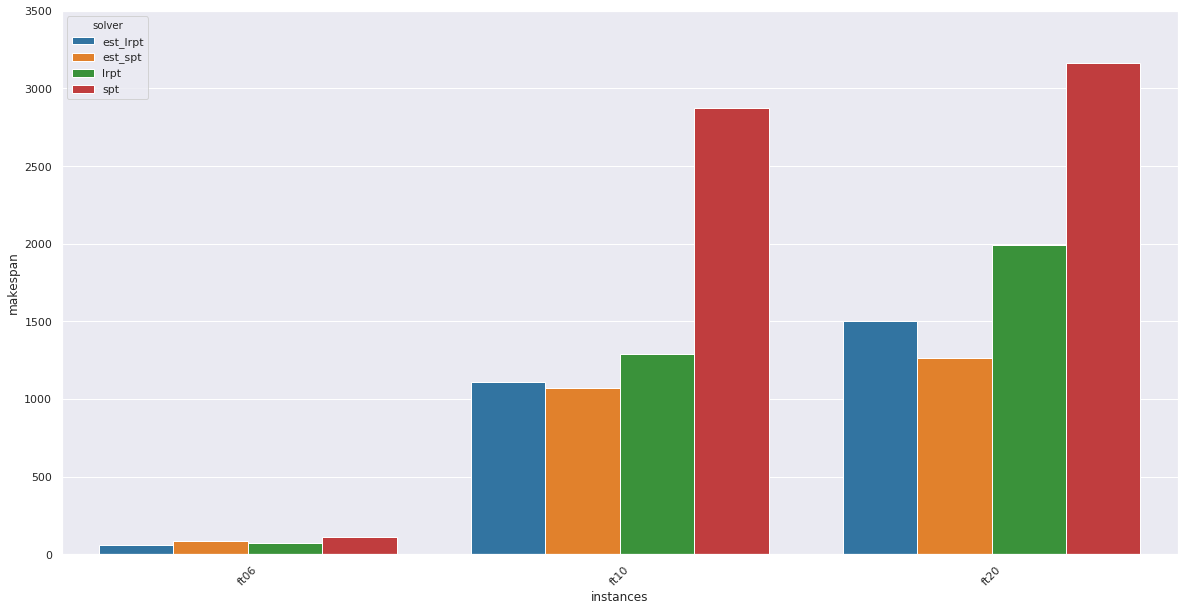

In [96]:
file_spoiler="../data/SPOILER_spoiler-glouton.txt"
lines_spoiler=read_file(file_spoiler)

df_spoiler=convert_df(*get_data(lines_spoiler),lines_spoiler)
plt.figure(figsize=(20,10))

toto=df_spoiler[(df_spoiler.instances.isin(["ft06","ft10","ft20"])) &
       (df_spoiler.solver.isin(["est_spt","est_lrpt","lrpt","spt"]))
       ]

sns.barplot(x='instances',
            y='makespan',
            hue='solver',
            data=toto.sort_values("solver"),
            palette="tab10"
           )

plt.xticks(rotation=45)
plt.ylim(0,3500)
plt.savefig(img_path+"1greedy_spoiler.png",dpi=300)
plt.show()

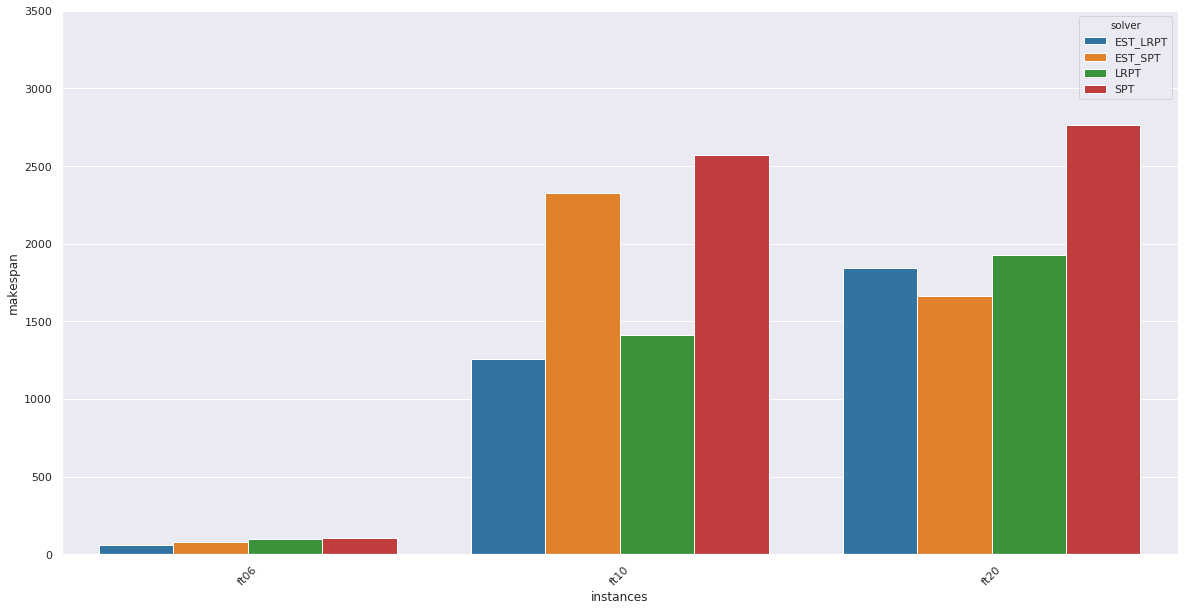

In [97]:
toto=df[(df.instances.isin(["ft06","ft10","ft20"])) &
       (df.solver.isin(["EST_SPT","EST_LRPT","LRPT","SPT"]))
       ]

plt.figure(figsize=(20,10))
sns.barplot(x='instances',
            y='makespan',
            hue='solver',
            data=toto.sort_values("solver"),
            palette="tab10"
           )

plt.xticks(rotation=45)
plt.ylim(0,3500)
plt.savefig(img_path+"1greedy_TTP.png",dpi=300)
plt.show()

## All greedy / instances names

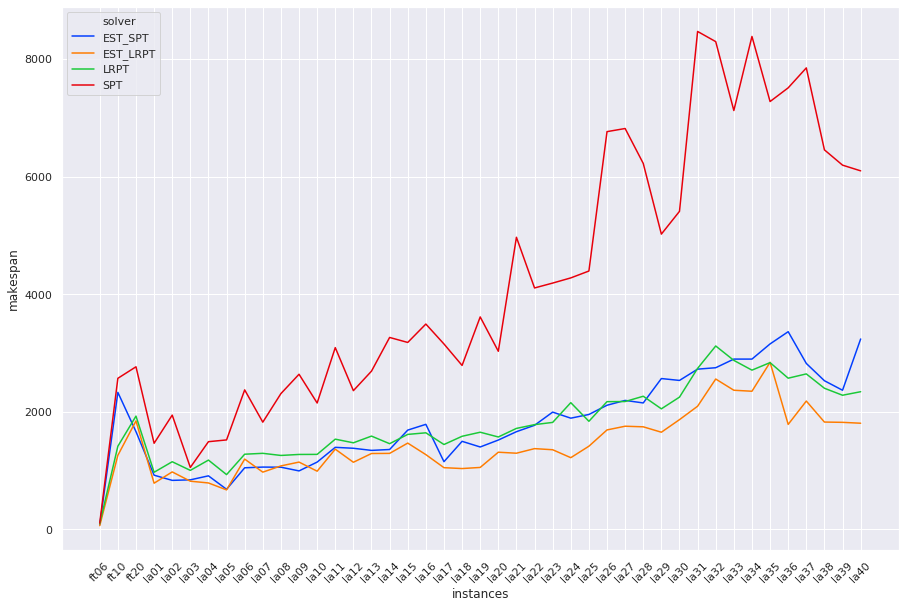

In [95]:
greedy=['EST_SPT', 'EST_LRPT', 'LRPT', 'SPT']
toto=df[df.solver.isin(greedy)]
img_path="../data/images/"
# df=df.sort_values("taille_instance")
sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.lineplot(x="instances",y="makespan",data=toto,hue="solver",palette="bright")
plt.xticks(rotation=45)
# plt.yscale("log")
plt.savefig(img_path+"2all_greedy_instances_name.png",dpi=300)
plt.show()


## All Descente / instances names

In [45]:
from glob import glob 

descent_files=glob("../data/descent*")
descent_files

['../data/descent_SPT.txt',
 '../data/descent_EST_LRPT.txt',
 '../data/descent_EST_SPT.txt',
 '../data/descent_LRPT.txt']

In [54]:
df_descent=pd.DataFrame()
for file in descent_files:
    descent_name=file.split("descent_")[1].split(".txt")[0]
    lines=read_file(file)

    df_temp=convert_df(*get_data(lines),lines)
    df_temp.solver=df_temp.solver+'_'+descent_name
    df_descent=pd.concat([df_descent,df_temp])
    
df_descent=df_descent[~df_descent.solver.str.contains('basic')]
df_descent=df_descent[~df_descent.solver.str.contains('best')]

df_descent

,instances,sizes,best_makespan,solver,runtimes,makespan,ecart,taille_instance
1,ft06,6x6,55,Descent_SPT,27,90,63.6,36
3,ft10,10x10,930,Descent_SPT,32,2128,128.8,100
5,ft20,20x5,1165,Descent_SPT,9,2030,74.2,100
7,la01,10x5,666,Descent_SPT,3,1099,65.0,50
9,la02,10x5,655,Descent_SPT,3,1222,86.6,50
11,la03,10x5,597,Descent_SPT,1,921,54.3,50
13,la04,10x5,590,Descent_SPT,2,1118,89.5,50
15,la05,10x5,593,Descent_SPT,3,1046,76.4,50
17,la06,15x5,926,Descent_SPT,11,1506,62.6,75
19,la07,15x5,890,Descent_SPT,13,1331,49.6,75


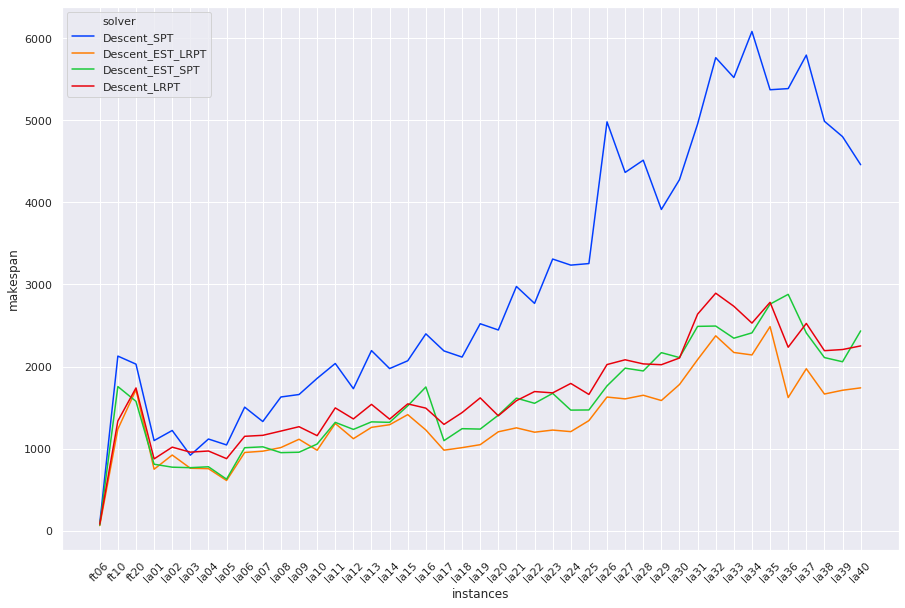

In [56]:
sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.lineplot(x="instances",y="makespan",data=df_descent,hue="solver",palette="bright")
plt.xticks(rotation=45)
# plt.yscale("log")
plt.savefig(img_path+"3all_descent_instances_name.png",dpi=300)
plt.show()

## Taboo + best descent / instances names

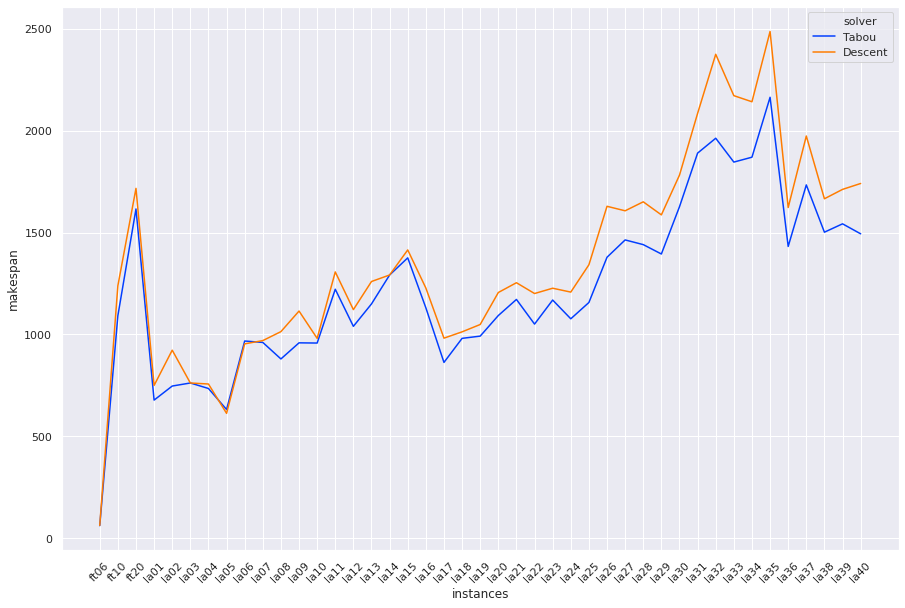

In [37]:
graph_solver=['Tabou', 'Descent']
toto=df[df.solver.isin(graph_solver)]

# df=df.sort_values("taille_instance")
sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.lineplot(x="instances",y="makespan",data=toto,hue="solver",palette="bright")
plt.xticks(rotation=45)
# plt.yscale("log")
plt.savefig(img_path+"4taboo_best_descent_instances_name.png",dpi=300)
plt.show()

## Best solver / instances names

In [18]:
df.solver.unique()

array(['basic', 'EST_SPT', 'EST_LRPT', 'LRPT', 'best', 'random', 'Tabou',
       'Descent', 'SPT'], dtype=object)

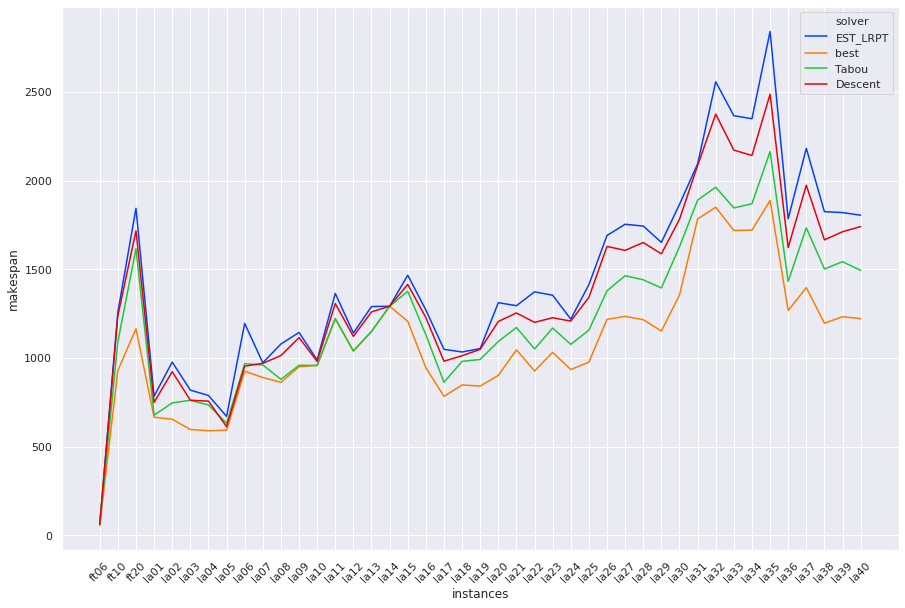

In [62]:
graph_solver=['Tabou', 'Descent',"best","EST_LRPT"]
toto=df[df.solver.isin(graph_solver)]

# df=df.sort_values("taille_instance")
sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.lineplot(x="instances",y="makespan",data=toto,hue="solver",palette="bright")
plt.xticks(rotation=45)
plt.savefig(img_path+"5best_solver_instances_name.png",dpi=300)
# plt.yscale("log")
plt.show()

## SPT glouton SPT descente / instances names

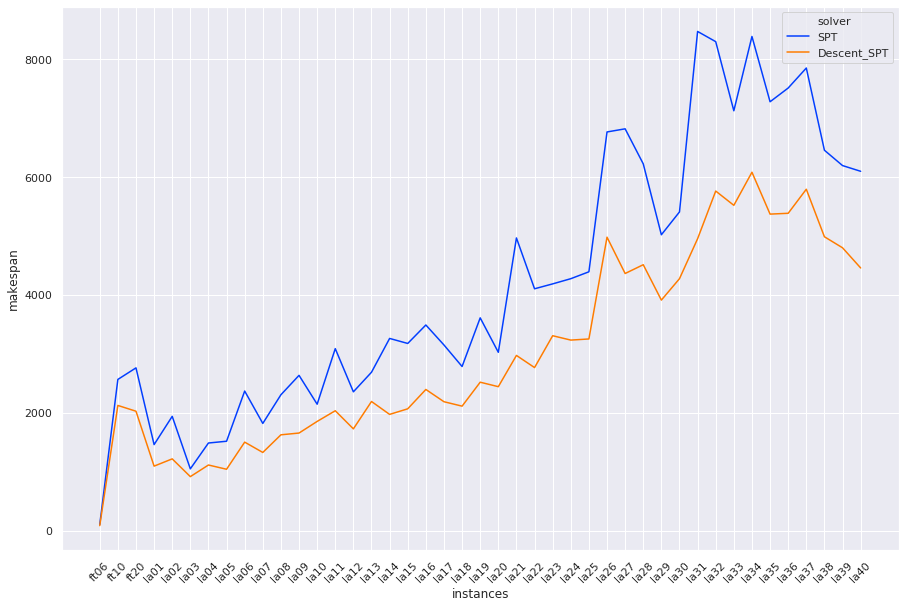

In [63]:
# df[df.solver=="SPT"]
# df_descent[df_descent.solver=="Descent_SPT"]

toto=pd.concat([df[df.solver=="SPT"],df_descent[df_descent.solver=="Descent_SPT"]])

# df=df.sort_values("taille_instance")
sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.lineplot(x="instances",y="makespan",data=toto,hue="solver",palette="bright")
plt.xticks(rotation=45)
plt.savefig(img_path+"6SPT_glouton_SPT_descent_instances_name.png",dpi=300)
# plt.yscale("log")
plt.show()

## LRPT glouton LRPT descente / instances names

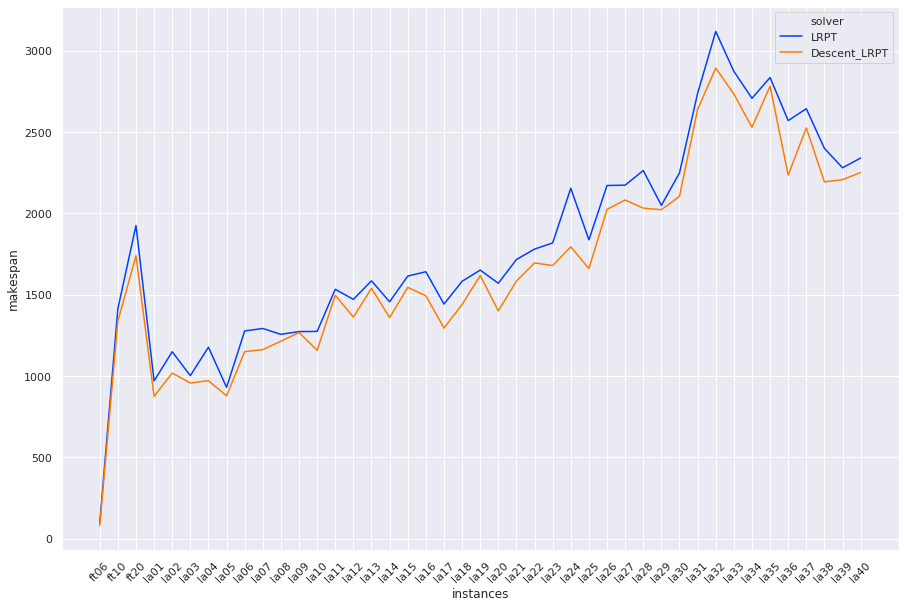

In [98]:
toto=pd.concat([df[df.solver=="LRPT"],df_descent[df_descent.solver=="Descent_LRPT"]])

# df=df.sort_values("taille_instance")
sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.lineplot(x="instances",y="makespan",data=toto,hue="solver",palette="bright")
plt.xticks(rotation=45)
plt.savefig(img_path+"7LRPT_glouton_LRPT_descent_instances_name.png",dpi=300)
# plt.yscale("log")
plt.show()

## EST_LRPT glouton EST_LRPT descente / instances names

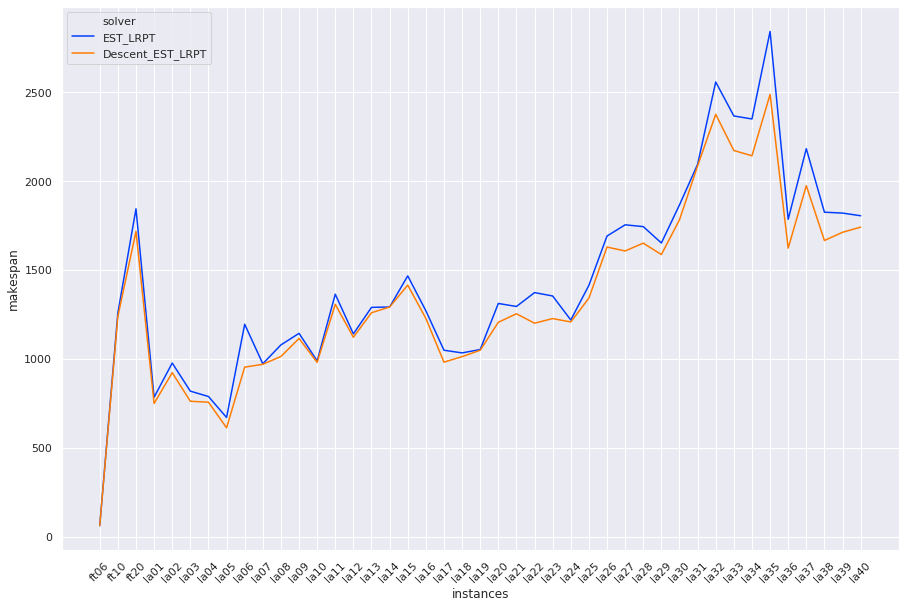

In [99]:
toto=pd.concat([df[df.solver=="EST_LRPT"],df_descent[df_descent.solver=="Descent_EST_LRPT"]])

# df=df.sort_values("taille_instance")
sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.lineplot(x="instances",y="makespan",data=toto,hue="solver",palette="bright")
plt.xticks(rotation=45)
plt.savefig(img_path+"8EST_LRPT_glouton_EST_LRPT_descent_instances_name.png",dpi=300)
# plt.yscale("log")
plt.show()

## EST_SPT glouton EST_SPT descente / instances names

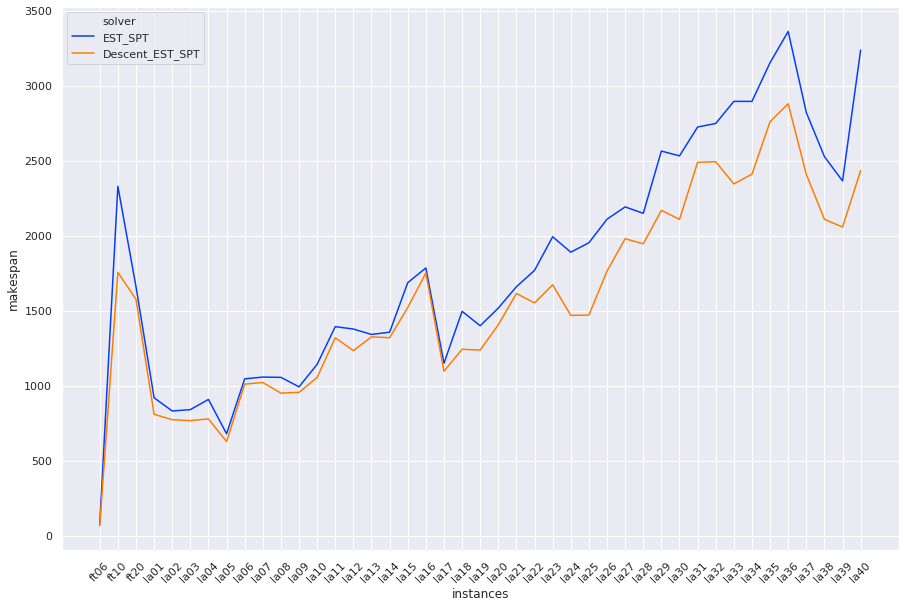

In [67]:
toto=pd.concat([df[df.solver=="EST_SPT"],df_descent[df_descent.solver=="Descent_EST_SPT"]])

# df=df.sort_values("taille_instance")
sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.lineplot(x="instances",y="makespan",data=toto,hue="solver",palette="bright")
plt.xticks(rotation=45)
plt.savefig(img_path+"9EST_SPT_glouton_EST_SPT_descent_instances_name.png",dpi=300)
# plt.yscale("log")
plt.show()

 ## SPT glouton, SPT descente, LRPT glouton, LRPT descente,EST_LRPT glouton,EST_LRPT descente,EST_SPT glouton, EST_SPT descente  sur le même graphe


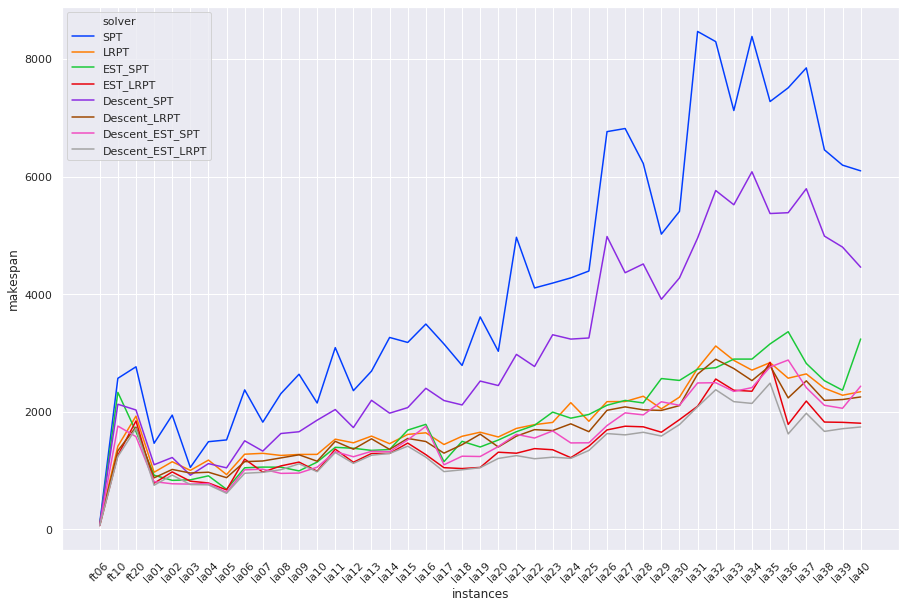

In [68]:
toto=pd.concat([df[df.solver=="SPT"],
                df[df.solver=="LRPT"],
                df[df.solver=="EST_SPT"],
                df[df.solver=="EST_LRPT"],
                df_descent[df_descent.solver=="Descent_SPT"],
                df_descent[df_descent.solver=="Descent_LRPT"],
                df_descent[df_descent.solver=="Descent_EST_SPT"],
                df_descent[df_descent.solver=="Descent_EST_LRPT"],
                
                
               ])

# df=df.sort_values("taille_instance")
sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.lineplot(x="instances",y="makespan",data=toto,hue="solver",palette="bright")
plt.xticks(rotation=45)
plt.savefig(img_path+"10all_glouton_all_descent_instances_name.png",dpi=300)
# plt.yscale("log")
plt.show()

## All solver / instances names

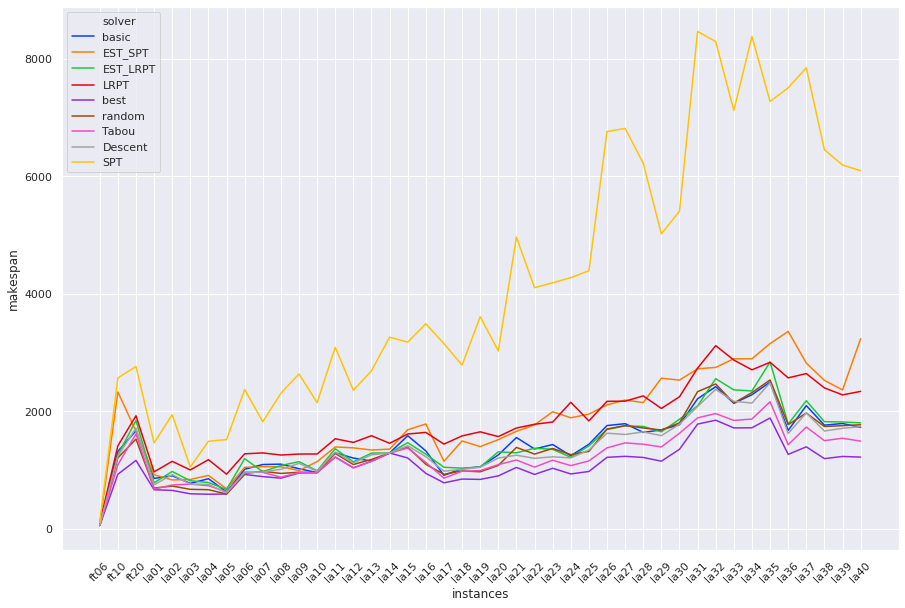

In [40]:
# df=df.sort_values("taille_instance")
sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.lineplot(x="instances",y="makespan",data=df,hue="solver",palette="bright")
# sns.lineplot(x="instances",y="best_makespan",data=df)
plt.xticks(rotation=45)
plt.savefig(img_path+"11all_solver_instances_name.png",dpi=300)

plt.show()

## All solver / instances sizes

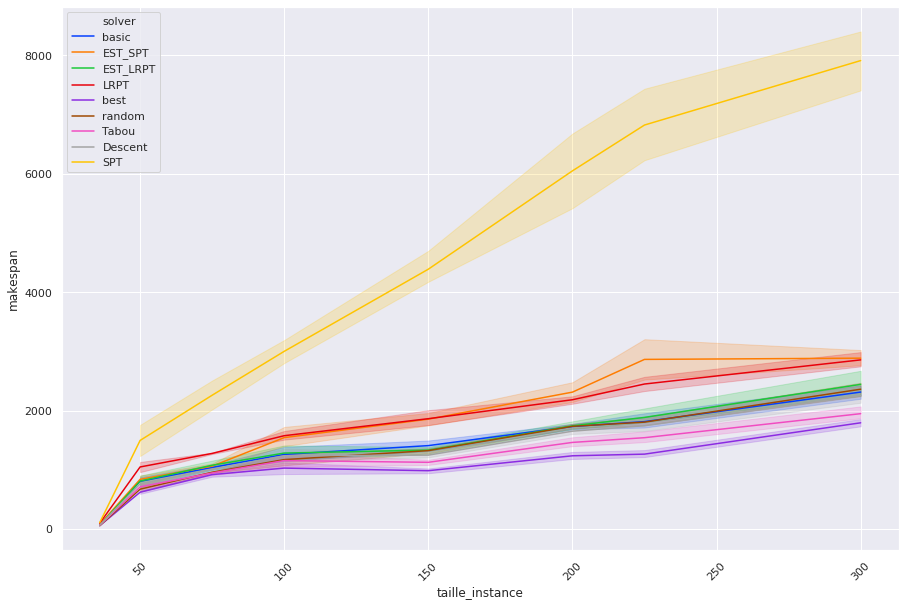

In [41]:
# df=df.sort_values("taille_instance")
sns.set(font_scale=1)
plt.figure(figsize=(15,10))
# sns.lineplot(x="taille_instance",y="makespan",data=df,hue="solver",palette="bright",ci=None)
sns.lineplot(x="taille_instance",y="makespan",data=df,hue="solver",palette="bright")
plt.xticks(rotation=45)
plt.savefig(img_path+"12all_solver_instances_sizes.png",dpi=300)

plt.show()
